# *IMPORT LIBRARIES*

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

# *LOAD THE DATASET*

In [47]:
#Load Pima indians dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# *EXPLORATORY DATA ANALYSIS (EDA)*

## Statitical Summary


In [48]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
# number of rows and columns
diabetes.shape

(768, 9)

In [50]:
# list types of all columns and find out if the dataset contains any null value
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The min value of "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" are Zero, however it is impossible for these values to be 0. Therefore, we should impute mean values of these respective columns. 

## Data Cleaning

### 1. Check the duplicate

In [51]:
#the shape before dropping (rows, columns)
diabetes.duplicated().sum()

0

There is no dupplicates. 

### 2. Check the Null values

In [52]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no NULL values in the dataset.

### 3. Check the number of Zero in the dataset

In [53]:
a= diabetes[diabetes["Glucose"]==0].shape[0]
b=diabetes[diabetes["BloodPressure"]==0].shape[0]
c= diabetes[diabetes["SkinThickness"]==0].shape[0]
d= diabetes[diabetes["Insulin"]==0].shape[0]
e= diabetes[diabetes["BMI"]==0].shape[0]

print("There are", a, "zero values in Glucose variable")
print("There are", b, "zero values in BloodPressure variable")
print("There are", c, "zero values in SkinThickness variable")
print("There are", d, "zero values in Insulin variable")
print("There are", e, "zero values in BMI variable")

There are 5 zero values in Glucose variable
There are 35 zero values in BloodPressure variable
There are 227 zero values in SkinThickness variable
There are 374 zero values in Insulin variable
There are 11 zero values in BMI variable


### 4. Replace zero values of above variables with theirs means

In [54]:
diabetes["Glucose"] = diabetes["Glucose"].replace(0, diabetes["Glucose"].mean())
diabetes["BloodPressure"] = diabetes["BloodPressure"].replace(0, diabetes["BloodPressure"].mean())
diabetes["SkinThickness"] = diabetes["SkinThickness"].replace(0, diabetes["SkinThickness"].mean())
diabetes["Insulin"] = diabetes["Insulin"].replace(0, diabetes["Insulin"].mean())
diabetes["BMI"] = diabetes["BMI"].replace(0, diabetes["BMI"].mean())

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

### 1. Outcome variable plot

Negative (0):  500
Positive (1):  268


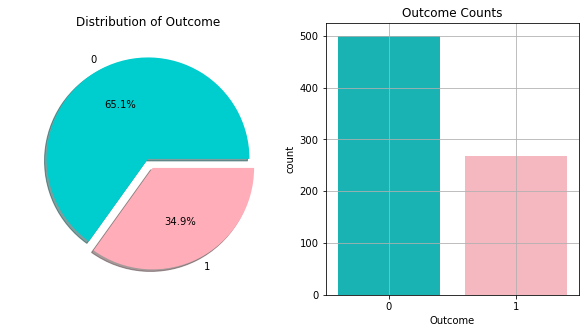

In [55]:
# Define custom colors
colors = ['#00CDCD', '#FFAEB9']

# Create a figure with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create a pie chart with custom colors in the left subplot
diabetes["Outcome"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=axes[0], shadow=True, colors=colors)
# Customize the first subplot's title and remove the y-axis label
axes[0].set_title("Distribution of Outcome")
axes[0].set_ylabel(" ")

# Create a count plot with custom colors in the right subplot
sns.countplot("Outcome", data=diabetes, ax=axes[1], palette=colors)
# Customize the second subplot's title
axes[1].set_title("Outcome Counts")

# Count the number of negative (0) and positive (1) outcomes
negative_count, positive_count = diabetes["Outcome"].value_counts()

# Print the counts of negative and positive outcomes
print("Negative (0): ", negative_count)
print("Positive (1): ", positive_count)

# Add grid and Show the 2 subplots
plt.grid()
plt.show()


In 768 surveyed people, 500 people are non diabetic (negative (0)) and 268 are diabetic (positive(1)).
#### The dataset is imbalanced because the number of patients with negative is higher than those with positive

### 2. Histogram for each feature

Using histogram as this is one the most common graphs to present numeric data.


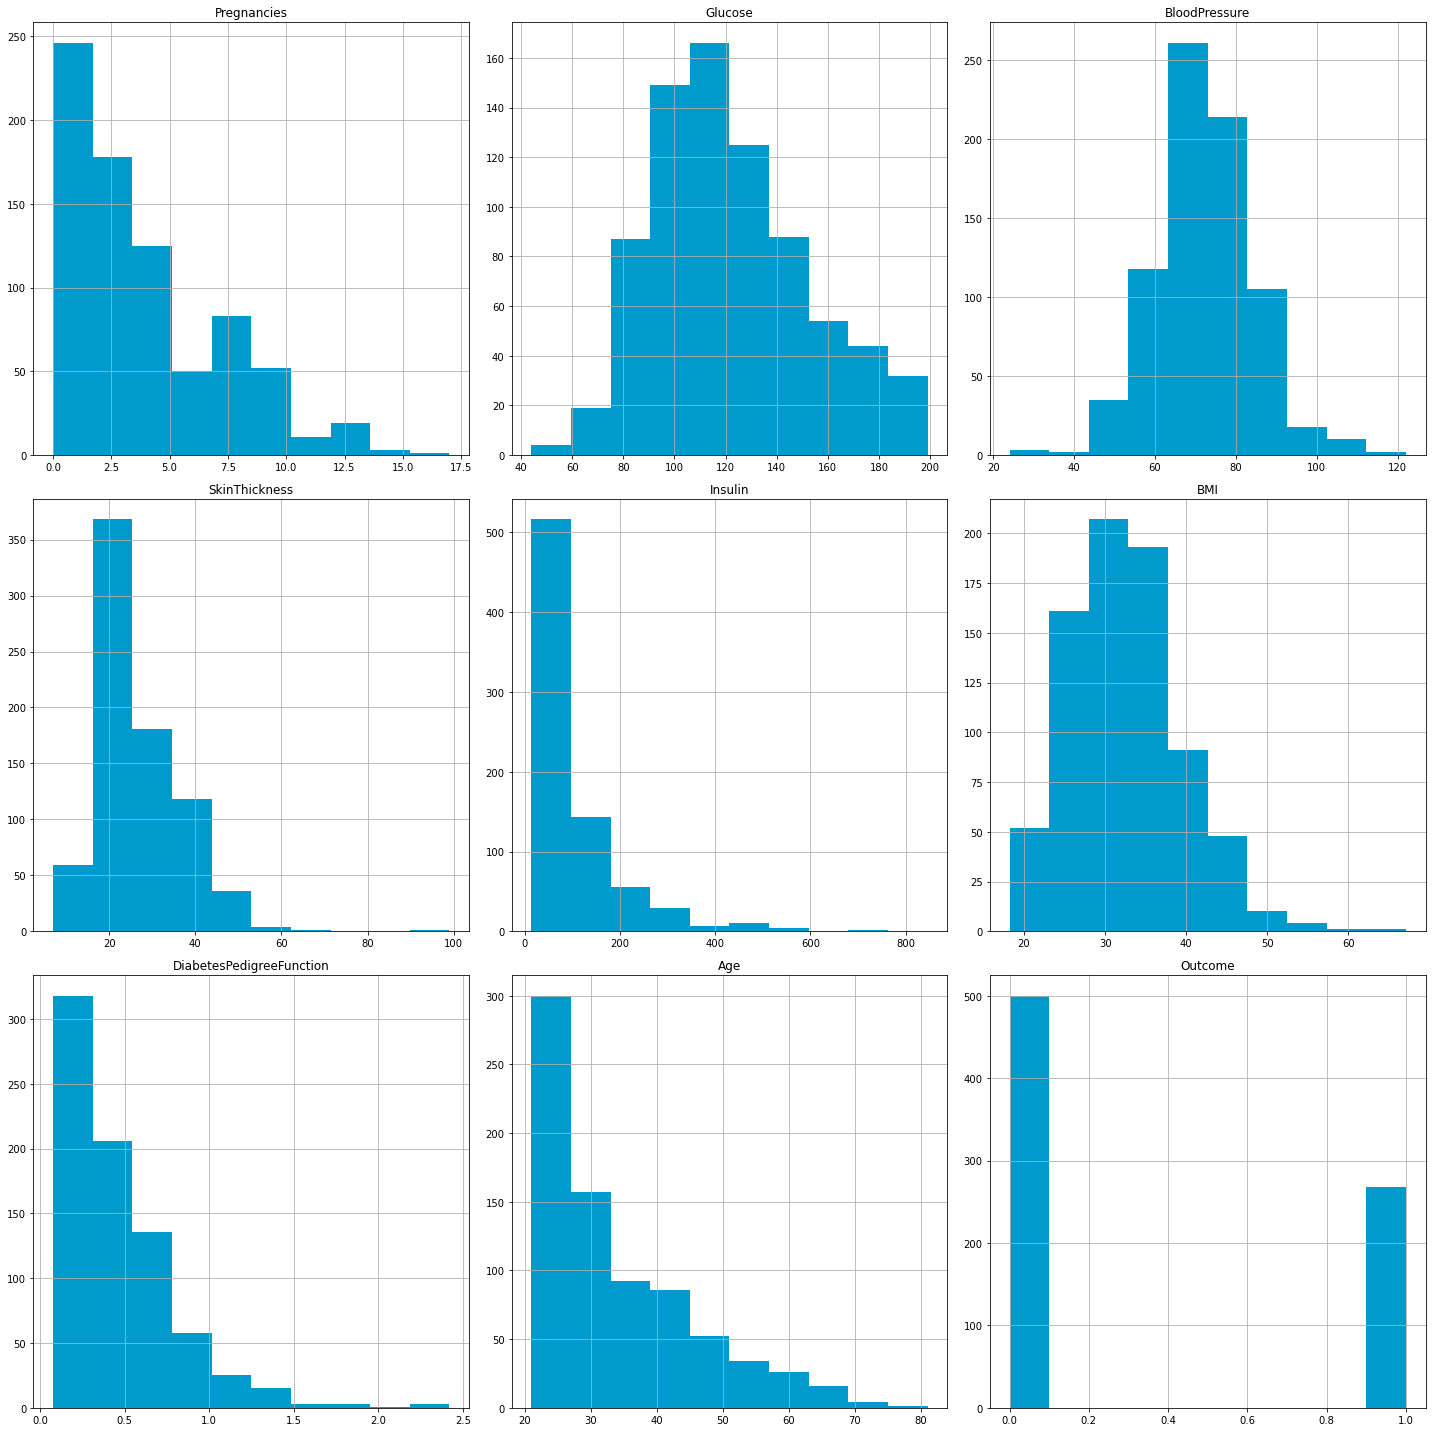

In [56]:
diabetes.hist(figsize=(20,20), color="#009ACD")
plt.tight_layout()
plt.show()

### 3. Correlation relationship 

Correlation analysis is used to qualify the degree to which 2 variables are related. You can evaluate correlation coeffienct that tells you how much 1 variable changes then the other one does. 
Correlation analysis provides you with a linear relationship between 2 variables. 
When we correlate feature variables with target variables, we get to know that how much dependency is there between particular feature variables and target variables. 

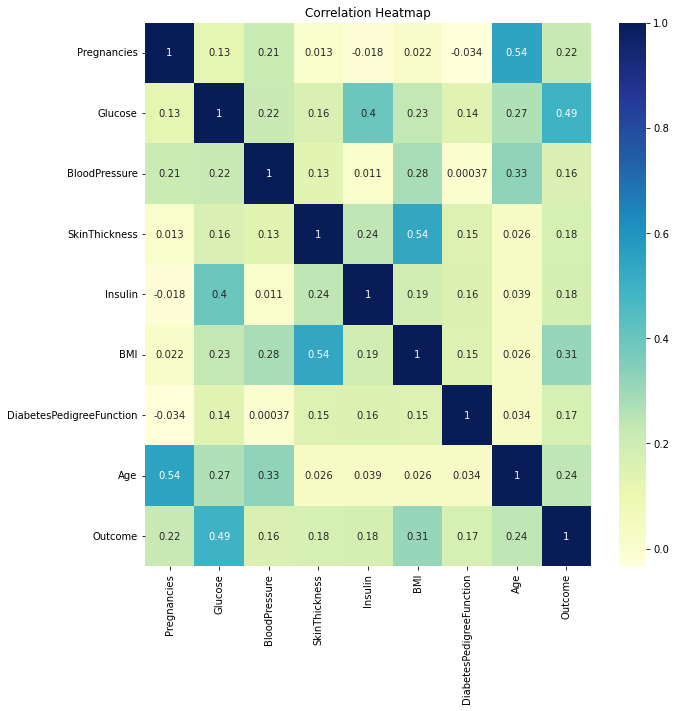

In [57]:
correlation = diabetes.corr()
top_corr_features = correlation.index
plt.figure(figsize = (10,10))
custom_palette = "YlGnBu"
plt.title("Correlation Heatmap")

#plot heat map
heat_map = sns.heatmap(diabetes[top_corr_features].corr(), annot=True, cmap=custom_palette)


#### According the heat map above, there is a high correlation between Outcome and Glucose(0.49), BMI(0.31), Age(0.24), Pregnancies(0.22), Insullin(0.18), SkinThickness(0.18)
#### We can select these features to accept input from the user and predict the outcome.

### 4. Pairplot

sns.pairplot() is a great way to create scatterplot between all of your variables. 

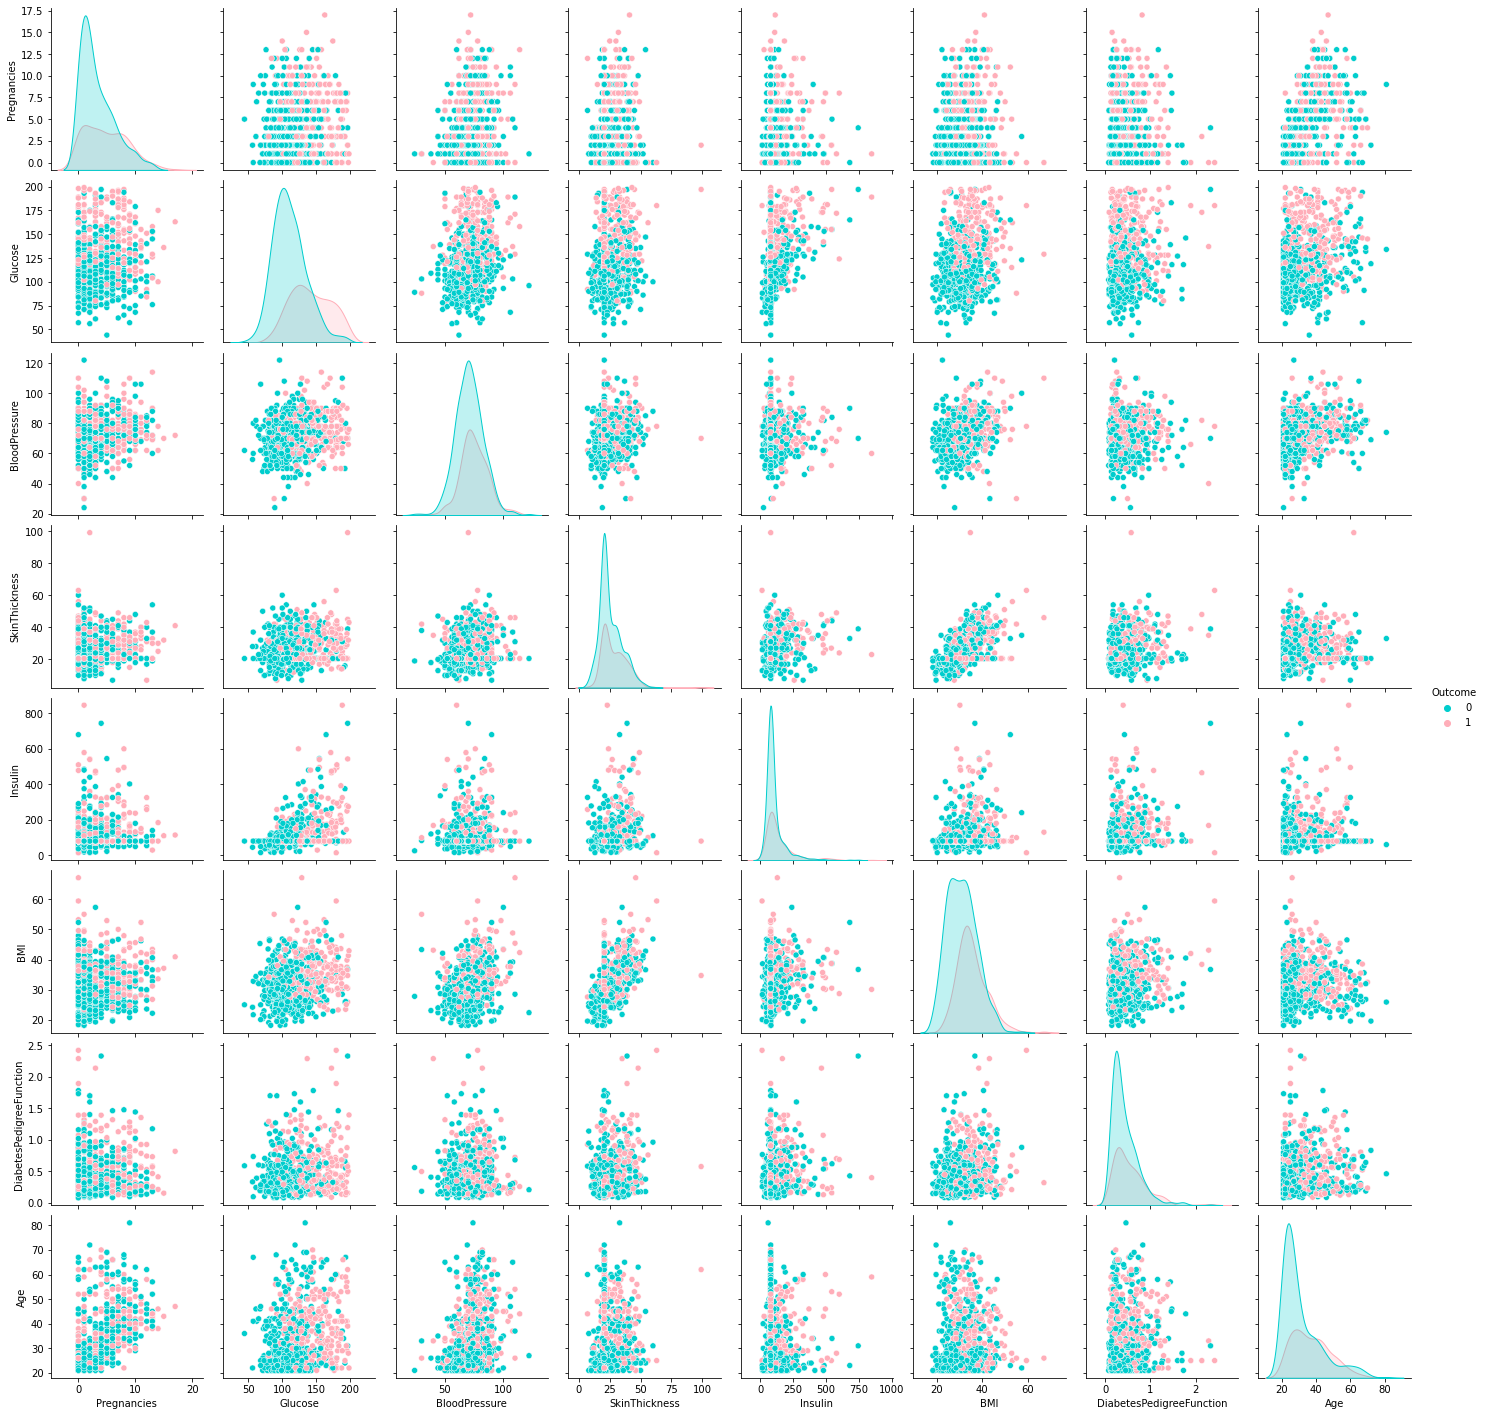

In [58]:
#Pairplot
custom_palette = ['#00CDCD', '#FFAEB9']
sns.pairplot(data = diabetes, hue = "Outcome", palette=custom_palette)
plt.show()

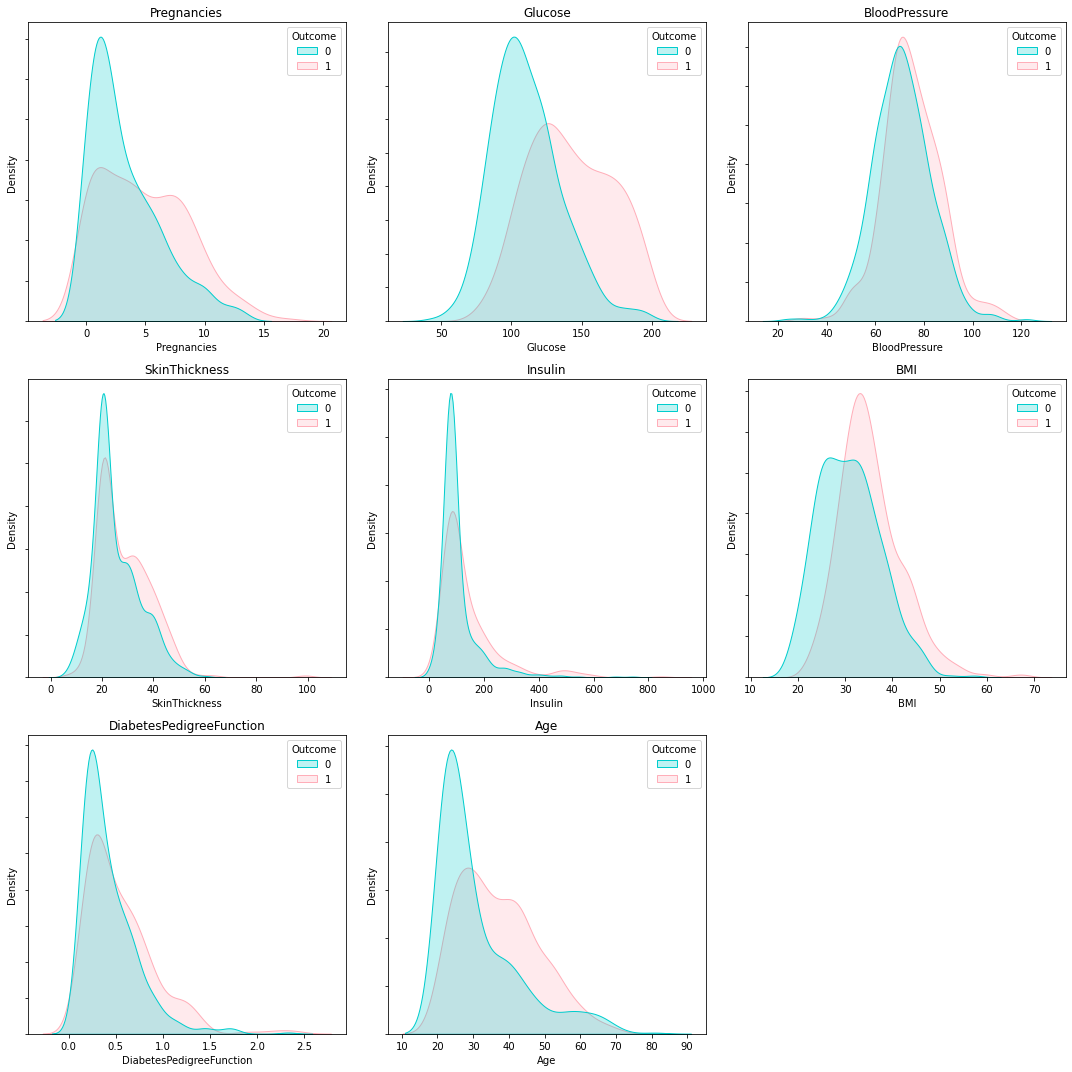

In [59]:
# Create a 3x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Colors for the 'No Diabetes' and 'Diabetes' groups
colors =  ['#00CDCD', '#FFAEB9']

# Iterate through each variable in the DataFrame (replace 'diabetes' with your DataFrame name)
for idx, col in enumerate(diabetes.columns):
    # Create a subplot within the grid
    ax = axes[idx // 3, idx % 3]
    # Remove the tick labels on the y-axis for a cleaner look
    ax.yaxis.set_ticklabels([])
    # Plot a density plot for the 'No Diabetes' group with color
    sns.kdeplot(data=diabetes, x=col, hue='Outcome',
        common_norm=False, shade=True, palette=colors,ax=ax)
    # Set the title of the subplot to the variable name
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
fig.delaxes(axes[2, 2])

# Adjust spacing between subplots for a cleaner layout
plt.tight_layout()
# Show the density plots
plt.show()

# *DATA PRE-PROCESSING*

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


## Extract input features and target variable


In [61]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

## Split the data to Training data and Testing data

In [62]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1879331)

## Standardize the features


In [63]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scale the target variable to {-1, +1}
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

# Convert data to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [64]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


# *IMPLEMENT MODEL*

## Create and train Perceptron model

In [71]:
class Perceptron:
    def __init__(self):
        # Initialize weights and bias to None
        self.weight = None
        self.bias = None

    def function(self, x):
        # Perceptron activation function: returns 1 
        #if weighted sum is greater than bias, else -1
        return 1 if (np.dot(self.weight, x) >= self.bias) else -1

    def predict_y(self, X):
        # Predict the output labels for a given set of input data X
        Y = []
        for x in X:
            result = self.function(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs=1, learning_rate=1):
        # Initialize weights to ones and bias to 0
        self.weight = np.ones(X.shape[1])
        self.bias = 0

        # Store accuracy, maximum accuracy, and weight history
        accuracy = {}
        max_accuracy = 0
        weight_history = []

        # Loop through epochs
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.function(x)
                if y == 1 and y_pred == -1:
                    # Update weights and bias for false negative
                    self.weight = self.weight + learning_rate * x
                    self.bias = self.bias - learning_rate * 1
                elif y == -1 and y_pred == 1:
                    # Update weights and bias for false positive
                    self.weight = self.weight - learning_rate * x
                    self.bias = self.bias + learning_rate * 1

            # Store weight matrix, calculate accuracy, and update max accuracy
            weight_history.append(self.weight.copy())
            y_pred_train = self.predict_y(X)
            accuracy[i] = accuracy_score(Y, y_pred_train)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                j = i
                checkpoint_weight = self.weight.copy()
                checkpoint_bias = self.bias

        # Update weights and bias to best values
        self.weight = checkpoint_weight
        self.bias = checkpoint_bias

        # Print maximum accuracy and plot accuracy history
        print(f"Max Accuracy: {max_accuracy:.2f} at Epoch {j}")
        plt.plot(list(accuracy.values()))
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(weight_matrix)
perceptron_model = Perceptron()


## Train model

Max Accuracy: 0.77 at Epoch 67


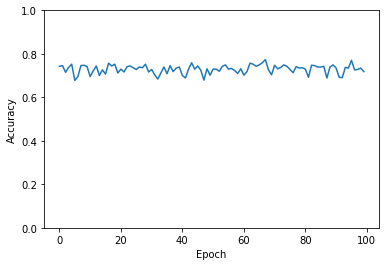

In [72]:
# Train the model on the training data
perceptron_model = Perceptron()

epochs = 100
learning_rate = 1
weight_history = perceptron_model.fit(X_train, y_train, epochs=epochs, learning_rate=learning_rate)

## Evaluate the model's performance 

### Confusion matrix

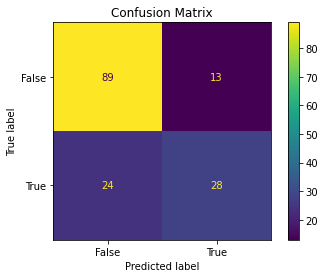

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_test)

# Create a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

# Plot the confusion matrix
cm_display.plot(cmap='viridis')  # You can specify a different colormap if desired
plt.title('Confusion Matrix')
plt.show()


### Testing accuracy, precision, recall, F1-score

In [74]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, precision_recall_curve,roc_curve, confusion_matrix
# Evaluate the trained model
y_pred_test = perceptron_model.predict_y(X_test)

#  accuracy
accuracy = accuracy_score(y_test, y_pred_test)

#  precision
precision = precision_score(y_test, y_pred_test)

#  recall
recall = recall_score(y_test, y_pred_test)

#  F1-score
f1 = f1_score(y_test, y_pred_test)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.76
Precision: 0.68
Recall: 0.54
F1-Score: 0.60


### ROC curve

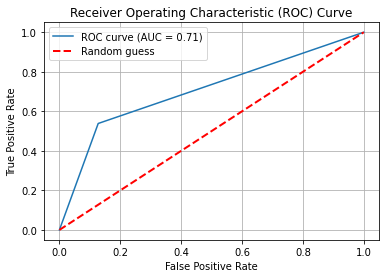

In [75]:
# Compute the ROC curve and calculate the area under the curve (AUC)
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_test)
area_under_curve = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve and add labels
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (AUC = %.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()